# Simple Linear Regression

#### Simple Linear Regression: 

1. Is a type of <b>predicitive</b> and statistical analysis model that allows us to summarize and study relationships between two continuous (quantitative) variables X and y.
    a) The one variable, X, is regarded as the predictor, explanatory or independent variable.
    b) The other denoted y is regarded as the response, outcome, or dependent variable.
2. Simple linear regression gets its adjective "simple," because it concerns the study of only one independent variable. In contrast, multiple linear regression, gets its adjective "multiple," because it concerns the study of two or more independent variables.
3. Since we are interested in summarizing the trend between two quantitative variables, the natural question arises — "what is the best fitting line? We use the following formula to do so.

Image of formula:

<img src="SLREquation.jpg", width=400, height=350>

Example of linear model: 

<img src="regressioncurv.png", width=400, height=350>

Note: Other topics in simple linear regression are the coefficient of determination r-squared, the correlation coefficient r, r-squared cautions. Read up on these to better understand the model and for accuracy.            

### Problem: Given the data set with overall years of experience and salary of 30 employees, create a regression model to determine what Salary correlates with the overall years of experience of the employee, and expected salary increment.

In [1]:
# Import Python libraries
# import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### Import the Dataset

In [2]:
# Dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset # show the whole datset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# Separate columns in the dataset to obtain the independent variable.
# iloc works on the positions of the index/columns (takes in integers as parameters).
X = dataset.iloc[:,:-1].values # x is matrix of features, the independent variable (YearsofExperience).
print(X) #print X values

[[  1.1]
 [  1.3]
 [  1.5]
 [  2. ]
 [  2.2]
 [  2.9]
 [  3. ]
 [  3.2]
 [  3.2]
 [  3.7]
 [  3.9]
 [  4. ]
 [  4. ]
 [  4.1]
 [  4.5]
 [  4.9]
 [  5.1]
 [  5.3]
 [  5.9]
 [  6. ]
 [  6.8]
 [  7.1]
 [  7.9]
 [  8.2]
 [  8.7]
 [  9. ]
 [  9.5]
 [  9.6]
 [ 10.3]
 [ 10.5]]


In [4]:
# y = dataset.head(n=10).iloc[:, 1].values - this is if we want to run only the first 10 columns .
# .values means that it will only show the values without any labels.
y = dataset.iloc[:, 1].values # y is the matrix of features, the dependent varibale (Salary).
print(y) # print y values

[  39343.   46205.   37731.   43525.   39891.   56642.   60150.   54445.
   64445.   57189.   63218.   55794.   56957.   57081.   61111.   67938.
   66029.   83088.   81363.   93940.   91738.   98273.  101302.  113812.
  109431.  105582.  116969.  112635.  122391.  121872.]


### Splitting the Dataset into Training Set and Test Set.

In [5]:
from sklearn.model_selection import train_test_split # This allows us to validate the splitting of the dataset.
# In paranthesis we are setting the test to 1/3 of the dataset and we'll let it be random. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) 

In [6]:
# Left side of the column is the index and its corresponding value (YearsExperience).
print(X_train) # outputs the training dataset of 20 samples out of 30 at random.

[[  2.9]
 [  5.1]
 [  3.2]
 [  4.5]
 [  8.2]
 [  6.8]
 [  1.3]
 [ 10.5]
 [  3. ]
 [  2.2]
 [  5.9]
 [  6. ]
 [  3.7]
 [  3.2]
 [  9. ]
 [  2. ]
 [  1.1]
 [  7.1]
 [  4.9]
 [  4. ]]


In [7]:
# Left side of the column is the index and its corresponding value (YearsExperience).
print(X_test) # outputs the test dataset of 10 datasets of 30 at random.

[[  1.5]
 [ 10.3]
 [  4.1]
 [  3.9]
 [  9.5]
 [  8.7]
 [  9.6]
 [  4. ]
 [  5.3]
 [  7.9]]


In [8]:
# Left side of the column is the index and its corresponding value (Salary).
print(y_train) # outputs the trainig dataset of 20 datasets of 30 at random.

[  56642.   66029.   64445.   61111.  113812.   91738.   46205.  121872.
   60150.   39891.   81363.   93940.   57189.   54445.  105582.   43525.
   39343.   98273.   67938.   56957.]


In [9]:
# Left side of the column is the index and its corresponding value (Salary).
print(y_test) # outputs the test dataset of 10 datasets of 30 at random.

[  37731.  122391.   57081.   63218.  116969.  109431.  112635.   55794.
   83088.  101302.]


### Fitting Simple Linear Regresion to the Trainig set.

Here is where our model will learn the correlation between the dependant (salary) variable and independant (yearsofexperience) variable. The machine in MACHINE LEARNING is the simple linear regression model (regressor), and the learning is the regressor learning from the X and y training set. 

In [10]:
from sklearn.linear_model import LinearRegression # LinearRegression is a class.
# object of LinearRegression class, where we create our linear regressor.
regressor = LinearRegression() # no parameters needed.
regressor.fit(X_train, y_train) # fit is a method.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Prediciting the Test Set results

In [11]:
y_pred = regressor.predict(X_test)
print(y_pred) # the machine model prints the predicted salary of employess based on the independant varibale (yearsofexperience).

[  40835.10590871  123079.39940819   65134.55626083   63265.36777221
  115602.64545369  108125.8914992   116537.23969801   64199.96201652
   76349.68719258  100649.1375447 ]


In [12]:
print(y_test) # prints the real salaries of the employees of the company. Stop here and compare the salaries of each employee. 

[  37731.  122391.   57081.   63218.  116969.  109431.  112635.   55794.
   83088.  101302.]


Some predicited salaries are close to the real salaries, while others are off by quite a bit. Reason is we use simple 
linear regresion, which is a straight line across the dataset on a graphical representation of the model.

### Visualize the Training Set Results.

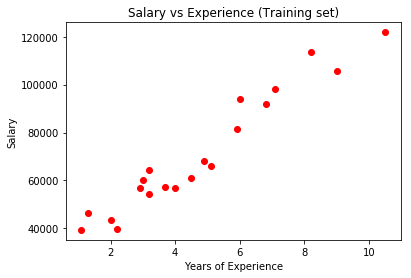

In [13]:
plt.scatter(X_train, y_train, color='red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show() 

The real values obtained from the dataset are represented by red dots.

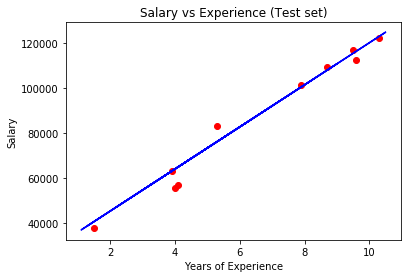

In [14]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

The predicted values are represented by the blue line (Simple Linear Regression).